In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loandefault/train.csv
/kaggle/input/loandefault/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/loandefault/train.csv')
df.drop(['ID'],axis=1,inplace=True)
df.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [3]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df[['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']] = df[['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']].apply(LabelEncoder().fit_transform)
numerical=df.select_dtypes(include=np.number)


In [5]:
X=numerical
Y=df["Loan Status"]
Y

0        0
1        0
2        0
3        0
4        0
        ..
67458    1
67459    0
67460    0
67461    0
67462    0
Name: Loan Status, Length: 67463, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

accuracy: 0.9005410212702883
precision: 0.9005410212702883
recall: 0.9005410212702883
f1_score: 0.9005410212702883
Confusion matrix

 [[12140    95]
 [ 1247    11]]

True Positives(TP) =  12140

True Negatives(TN) =  11

False Positives(FP) =  95

False Negatives(FN) =  1247


<Axes: >

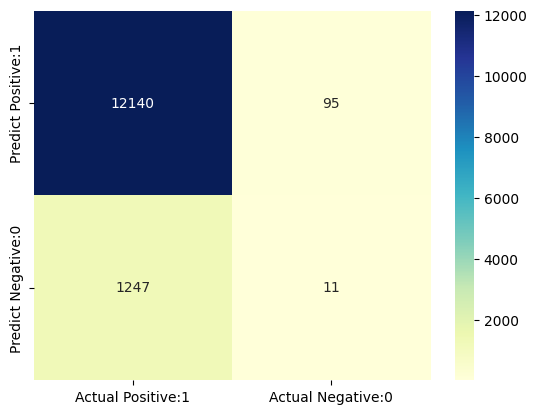

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
# visualize confusion matrix with seaborn heatmap
import seaborn as sns 
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix



bc=GaussianNB()
bc.fit(X_train,Y_train)
pred=bc.predict(X_test)
print('accuracy:',accuracy_score(pred,Y_test))
print('precision:',precision_score(pred,Y_test,average='micro'))
print('recall:',recall_score(pred,Y_test,average='micro'))
print('f1_score:',f1_score(pred,Y_test,average='micro'))

cm = confusion_matrix(Y_test, pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')